<a href="https://colab.research.google.com/github/itoshiyanazawa/cnn_project/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1

1. Load the CIFAR-10 dataset (You can use libraries like TensorFlow/Keras or PyTorch to load
the dataset.)
2. Explore the dataset (e.g., visualize some images, check the class distribution).
3. Use proper transformation on your data if required.
4. Normalize the image data.
5. Split the data into training, validation and test sets.

In [9]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10

# Set a seed value
SEED = 42

# Set the seed for NumPy
np.random.seed(SEED)

# Set the seed for TensorFlow
tf.random.set_seed(SEED)

# 1. Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# 2. Combine train and test data
x_all = np.concatenate((x_train, x_test), axis=0)
y_all = np.concatenate((y_train, y_test), axis=0)

# 3. Function to split data equally
def split_data_equally(x, y, train_ratio=0.8):
    num_classes = 10
    indices = []
    for i in range(num_classes):
        idx = np.where(y == i)[0]
        np.random.shuffle(idx)
        split = int(len(idx) * train_ratio)
        indices.append((idx[:split], idx[split:]))

    train_indices = np.concatenate([i[0] for i in indices])
    val_indices = np.concatenate([i[1] for i in indices])

    np.random.shuffle(train_indices)
    np.random.shuffle(val_indices)

    return x[train_indices], y[train_indices], x[val_indices], y[val_indices]

# 4. Split the data
x_train, y_train, x_val, y_val = split_data_equally(x_all, y_all)

# 5. Verify class distribution
def count_classes(y):
    return np.bincount(y.flatten())

print("Train set class distribution:", count_classes(y_train))
print("Validation set class distribution:", count_classes(y_val))
print("Test set class distribution:", count_classes(y_test))


Train set class distribution: [4800 4800 4800 4800 4800 4800 4800 4800 4800 4800]
Validation set class distribution: [1200 1200 1200 1200 1200 1200 1200 1200 1200 1200]
Test set class distribution: [1000 1000 1000 1000 1000 1000 1000 1000 1000 1000]


In [10]:
print('Image size of x_train: ', x_train.shape)
print('Image size of x_val: ', x_val.shape)
print('Image size of x_test: ', x_test.shape)

Image size of x_train:  (48000, 32, 32, 3)
Image size of x_val:  (12000, 32, 32, 3)
Image size of x_test:  (10000, 32, 32, 3)


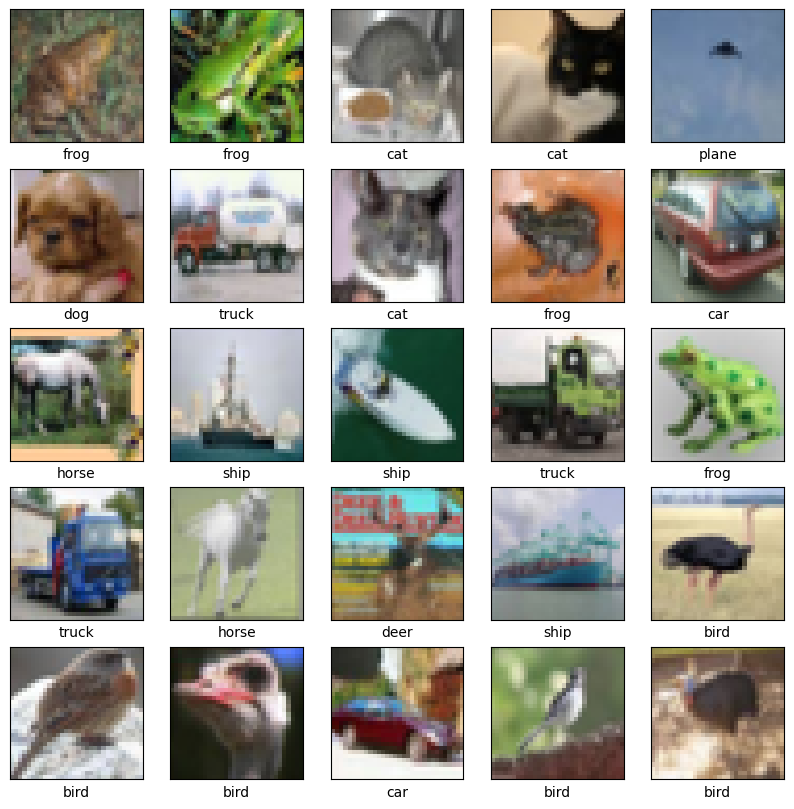

In [11]:
# Visualize images
import matplotlib.pyplot as plt


classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(classes[y_train[i][0]])
plt.show()



*   Do normalization before image transformation to keep image information secure



In [12]:
# Normalize images
x_train = x_train / 255.0
x_test = x_test / 255.0
x_val = x_val / 255.0



*   Color is not important information in this case, object is important feature

*   Try color ones later to see improvement






In [13]:
# Transform into grayscale
x_train = tf.image.rgb_to_grayscale(x_train)
x_test = tf.image.rgb_to_grayscale(x_test)
x_val = tf.image.rgb_to_grayscale(x_val)

# Step 2
1. Define the CNN architecture (e.g., using Keras or PyTorch).
2. Explain what type of layers you are including and why (layers like Conv2D, MaxPooling2D,
Flatten, Dense, …)
3. Visualize your CNN architecture
4. Compile the model with appropriate loss function and optimizer. Explain your choice of loos
function and optimizer.
5. Train the model on the training data and validate it on the validation set.
6. Visualize the training process using both training and validation results.

In [88]:
# Define the CNN architecture
import keras
num_classes = 10
input_shape = (32, 32, 1)

model = keras.Sequential(
    [
        keras.layers.Input(shape=input_shape),
        keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'),
        keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'),
        keras.layers.MaxPooling2D(pool_size=(2,2)),
        keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
        keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
        keras.layers.MaxPooling2D(pool_size=(2,2)),
        keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu'),
        keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu', name='last_conv'),
        keras.layers.GlobalAveragePooling2D(),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(num_classes, activation='softmax')
    ]
)

In [89]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 30, 30, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 28, 28, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 12, 12, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 10, 10, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 3, 3, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ last_conv (Conv2D)                   │ (None, 1, 1, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 128)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 287,722 (1.10 MB)

 Trainable params: 287,722 (1.10 MB)

 Non-trainable params: 0 (0.00 B)

**Why this architecture**

*   conv2D: To devide data into small pieces (kernel?), repeating it to learn increasingly complex and abstract representations
  *   By increaing the number of filters, it makes CNN learn images in detail (hierarical structure?)
*   ReLu: helps CNN learn non-linear relationship between features and images
*   max_pooling: To capture the most important features on each kernel
*   global_average_pooling: Enforces correspondence between feature maps and categories
*   dropout: To avoid overfitting to the training dataset
*   dense: To learn combination of features from the previous layers
*   softmax: To give probabilities for each class to choose the biggest value as output




In [90]:
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

**Why these loss function and optimizer**


*   **SparseCategoricalCrossentropy**: This loss function is suitable for multi-class classification, like this 10 class clasification. It computes the cross-entropy loss between the true class labels and the predicted probabilities, ensuring that the model effectively learns to classify images into one of these distinct categories

*   **Adam**: This was chosen because of its adaptive learning rate capabilities, which make it effective for training CNN. Also, it requires less memory and high performance



In [91]:
batch_size = 128
epochs = 20

callbacks = [
    keras.callbacks.ModelCheckpoint('model_at_epoch_{epoch}.keras'),
    keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 2),
]

train_progress = model.fit(
    x_train, y_train,
    batch_size = batch_size,
    epochs = epochs,
    validation_data = (x_val, y_val),
    callbacks = callbacks,
)

score = model.evaluate(x_val, y_val, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.2228 - loss: 2.0816 - val_accuracy: 0.4423 - val_loss: 1.5624
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.4347 - loss: 1.5883 - val_accuracy: 0.5326 - val_loss: 1.3135
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.5273 - loss: 1.3539 - val_accuracy: 0.5944 - val_loss: 1.1420
Epoch 4/20
 85/375 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5810 - loss: 1.1972

KeyboardInterrupt: 

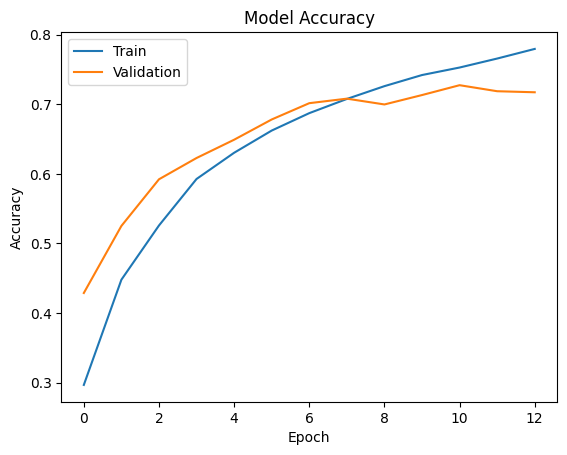

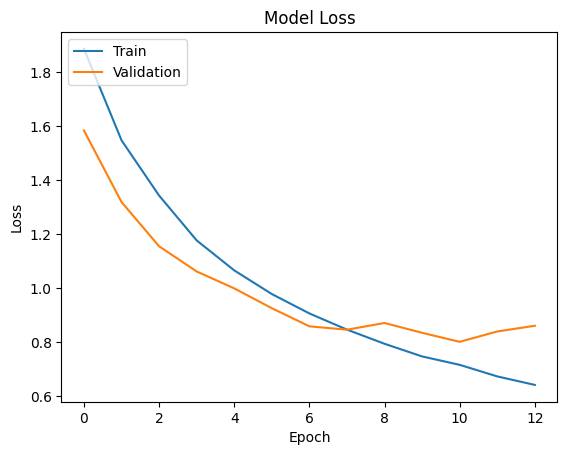

In [18]:
# Visualize the training process using both training and validation results.
import matplotlib.pyplot as plt

history = train_progress.history

# Plot training and validation accuracy values
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training and validation loss values
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Step 3
1. Use the trained model to predict labels for the test set.
2. Compute performance metrics such as accuracy, precision, recall, and F1-score (Explain your
choice).
3. Visualize your confusion matrix.
4. Analyze the results and identify potential improvements.

In [19]:
# Use the trained model to predict labels for the test set
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


**Compute performance**

*   **Accuracy**: To evaluate the overall model performance, check the proportion of the number of correct decision making out of all predictions
*   **Precision**: To assess the model performance if it can identify instances of a particular class correctly
*   **Recall**: To measures the model's ability to identify all instances of a particular class
*   **F1-score**: To balance the trade-off between identifying true positives and minimizing false positives. In this case, we would like to perform well to get true positives, at the same time, minimize misclasification or false positives, so applied this metric






In [23]:
# Accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Precision
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred, average='weighted')
print('Precision:', precision)

# Recall
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred, average='weighted')
print('Recall:', recall)

# F1 score
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred, average='weighted')
print('F1 score:', f1)

Accuracy: 0.7754
Precision: 0.7895017072905575
Recall: 0.7754
F1 score: 0.772654281703198


**Performance Analysis**


*   F1 score is below 0.8, so performance of this model is average.
*   Comapring accuracy and recall, there's no difference, that shows our model is balancly detected 10 classes.



Text(95.72222222222221, 0.5, 'True')

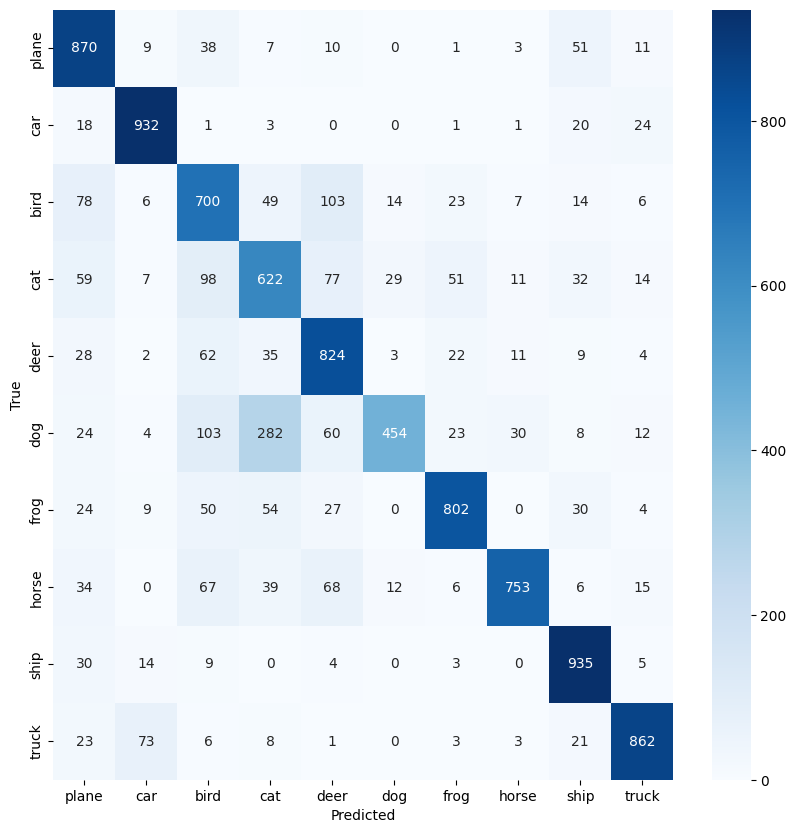

In [24]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')

**Confusion matrix analysis**


*   This chart shows that our model struggle to differenciate from cat to dog.
  *    Identify which information our model used to classify
    *    Create image heat map
*   Animals except frog were poor performance



In [58]:
# implement grad-cam
import numpy as np
import matplotlib.pyplot as plt
import cv2

def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # Create a model that maps the input image to the activations
    # of the last conv layer and the output predictions
    grad_model = tf.keras.models.Model(
        inputs=[model.inputs],
        outputs=[model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # Gradient of the output neuron with respect to the output feature map
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # Vector of mean intensity of the gradient over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # Weight the channels by corresponding gradients
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # Normalize the heatmap
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()


In [59]:
def display_gradcam(img_path, model, last_conv_layer_name, class_index=None):
    # Load and preprocess the image
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(32, 32))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0

    # Generate heatmap
    heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name, class_index)

    # Display original image
    img = cv2.imread(img_path)
    img = cv2.resize(img, (32, 32))

    # Rescale heatmap to 0-255
    heatmap = np.uint8(255 * heatmap)

    # Apply colormap to heatmap
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

    # Superimpose heatmap on original image
    superimposed_img = cv2.addWeighted(img, 0.5, heatmap, 0.5, 0)

    # Display the results
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB))
    plt.title('Grad-CAM Heatmap')
    plt.axis('off')

    plt.show()


In [87]:
# Assuming CIFAR-10 classes are:
# 0: airplane, 1: automobile, 2: bird, 3: cat, 4: deer, 5: dog, 6: frog, 7: horse, 8: ship, 9: truck

# Find an example of a cat image in the test set
cat_indices = np.where(y_test == 3)[0]  # Cat is class 3
cat_example_index = cat_indices[0]
cat_img = x_test[cat_example_index]

# Save the cat image temporarily
plt.imsave('temp_cat.jpg', cat_img)

# Find an example of a dog image in the test set
dog_indices = np.where(y_test == 5)[0]  # Dog is class 5
dog_example_index = dog_indices[0]
dog_img = x_test[dog_example_index]

# Save the dog image temporarily
plt.imsave('temp_dog.jpg', dog_img)

# Display Grad-CAM for cat image (class index 3)
display_gradcam('/content/temp_cat.jpg', model, 'conv2d_5', class_index=3)

# Display Grad-CAM for dog image (class index 5)
display_gradcam('/content/temp_dog.jpg', model, 'conv2d_5', class_index=5)


AttributeError: The layer sequential has never been called and thus has no defined output.

In [80]:
# Find cat and dog indices
cat_indices = np.where(y_test == 3)[0]  # Cat is class 3
dog_indices = np.where(y_test == 5)[0]  # Dog is class 5


In [81]:
cat_indices

array([   0,    8,   46,   53,   61,   63,   68,   77,   78,   91,  103,
        106,  115,  121,  127,  143,  176,  184,  187,  205,  224,  245,
        251,  256,  271,  273,  277,  279,  294,  302,  320,  323,  332,
        336,  356,  367,  397,  399,  412,  418,  426,  432,  434,  438,
        453,  456,  464,  467,  470,  515,  558,  565,  573,  586,  597,
        599,  607,  608,  637,  641,  646,  650,  664,  669,  671,  673,
        676,  688,  690,  695,  715,  716,  727,  739,  760,  786,  790,
        792,  811,  819,  825,  829,  831,  845,  862,  863,  866,  870,
        874,  878,  882,  896,  898,  911,  916,  932,  945,  948,  950,
        957,  986,  995,  998, 1014, 1024, 1030, 1031, 1033, 1050, 1053,
       1056, 1065, 1070, 1074, 1088, 1112, 1121, 1123, 1124, 1129, 1163,
       1166, 1168, 1173, 1179, 1180, 1181, 1208, 1219, 1227, 1247, 1268,
       1269, 1274, 1275, 1280, 1334, 1346, 1353, 1368, 1373, 1377, 1386,
       1395, 1411, 1416, 1442, 1445, 1454, 1468, 14

In [82]:
cat_example_index = cat_indices[0]
cat_example_index

0

In [83]:
cat_img = x_test[cat_example_index]

# Save the cat image temporarily
plt.imsave('temp_cat.jpg', cat_img)